<a href="https://colab.research.google.com/github/estradajhonatandavid/Maestria-AI./blob/main/Taller_5_Entrega.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ANÁLISIS DE RIPS**


*Registros Individuales de Prestación de Servicios de Salud :* es un sistema donde se recolecta **información detallada sobre cada uno de los servicios de salud que se prestan a los usuarios**, como consultas médicas, procedimientos, hospitalizaciones, etc. Cada vez que un prestador de servicios de salud (hospital, clínica, etc.) atiende a un paciente, se genera un registro en el RIPS con todos los datos relevantes de esa atención.
* Es importante decir que esta fuente de datos pública tiene un **subregistro bastante amplio**, del cual no se tiene un estimado claro.

**Pregunta SMART**

¿Es posible **predecir** con más de un ***85% de precisión***la demanda mensual para 2024 de dispositivos para **angioplastia coronaria transluminal percutánea (uno o dos vasos)** en las **cinco ciudades con más casos del país**, **utilizando los datos históricos de RIPS**, para optimizar la cadena de suministro y reducir el inventario excedente en un 15% ?

* Descripción del problema:* Una empresa de dispositivos médicos enfrenta dificultades para **planificar la demanda** de dispositivos para **angioplastia** debido a la variabilidad regional, lo que genera **inventarios ineficientes y costos adicionales**.

* Justificación del uso de ciencia de datos o IA: La ciencia de datos puede analizar los datos históricos de RIPS para **predecir la demanda, optimizando la cadena de suministro y reduciendo el inventario excedente**  Esto permite una planificación más precisa y eficiente.

In [44]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
#Se carga la muestra de la base de datos de RIPS

import pandas as pd

file_path = '/content/drive/My Drive/Maestria AI/SISPRO.xlsx'
# Se carga el archivo usando pandas
df = pd.read_excel(file_path, engine='openpyxl')
#Revisamos el tamaño del Data Frame
df.shape

(695988, 10)

In [46]:
#Revisión de nombre de Columnas
print(df.columns)

Index(['Anno', 'Mes', 'Departamento', 'Municipio', 'Administradora',
       'Prestador', 'Procedimiento CUPS', 'Número de Atenciones',
       'Número de Personas Atendidas', 'Conteo de Prestadores'],
      dtype='object')


**DICCIONARIO DE DATOS**

*Año:* Representa el año calendario en el cual se registró la prestación del servicio de salud. Se utiliza para agrupar y analizar los datos en periodos anuales.

*Mes:* Indica el mes calendario en el cual se realizó la prestación del servicio de salud. Al igual que el año, permite segmentar los datos temporalmente, facilitando el análisis mensual.

*Departamento:* Corresponde a la división político-administrativa en la cual se encuentra el prestador de servicios de salud. Es un identificador geográfico que ayuda a ubicar la prestación dentro del territorio nacional.

*Municipio: *Similar al departamento, el municipio es una subdivisión administrativa que especifica la localización más precisa de la prestación del servicio. Junto con el departamento, proporciona un marco geográfico detallado.

*Administradora*: Se refiere a la Entidad Administradora de Planes de Beneficios (EAPB) a la cual está afiliada la persona que recibió el servicio. Esta entidad es responsable de la administración de los recursos y la garantía de la prestación de los servicios de salud a los afiliados.

*Prestador:* Hace referencia a la institución o profesional de la salud que realizó el servicio. Puede ser una clínica, hospital, centro de salud, o un profesional independiente.

*Procedimiento CUPS:* El CUPS (Clasificación Única de Procedimientos en Salud) es un código estándar utilizado para identificar los procedimientos médicos y servicios de salud prestados. Este código es clave para entender qué tipo de intervención o servicio fue realizado.

*Número de Atenciones:* Indica la cantidad total de veces que se realizó un procedimiento o se brindó un servicio específico dentro de un periodo determinado (por ejemplo, un mes). Refleja la frecuencia de prestación del servicio.

*Número de Personas Atendidas:* Es el conteo de pacientes únicos que recibieron el servicio o procedimiento específico. Este número es crucial para evaluar la cobertura del servicio en la población.

**IMPORTANCIA DE LAS 2 COLUMNAS: Procedimientos CUPS - Número de Atenciones / Número de Personas Atendidas**

Las columnas **Procedimientos CUPS** y **Número de Atencione/Número de Personas Atendidas** son esenciales para proyectos de ciencia de datos o IA porque:

Demanda y Utilización: Ayudan a entender **cuántas veces se aplica el procedimiento (angioplastia coronaria transluminal percutánea)** y cuántas personas únicas se benefician, lo que es clave para analizar la demanda y la cobertura.

Modelos Predictivos: Son **fundamentales para predecir la futura demanda** de este **procedimiento** y optimizar la **asignación de recursos** en el sistema de salud.

In [47]:
#Revisión del tipo de datos
print(df.dtypes)

Anno                            float64
Mes                              object
Departamento                     object
Municipio                        object
Administradora                   object
Prestador                        object
Procedimiento CUPS               object
Número de Atenciones              int64
Número de Personas Atendidas    float64
Conteo de Prestadores           float64
dtype: object


In [48]:
print(df['Mes'].unique())

[nan 'Enero' 'Febrero' 'Marzo' 'Abril' 'Mayo' 'Junio' 'Julio' 'Agosto'
 'Septiembre' 'Octubre' 'Noviembre' 'Diciembre']


**AJUSTE DE FORMATOS**

In [49]:
#Convierto el campo Mes a número para facilitar ordenamientos
meses = {
    'Enero': 1, 'Febrero': 2, 'Marzo': 3, 'Abril': 4, 'Mayo': 5, 'Junio': 6,
    'Julio': 7, 'Agosto': 8, 'Septiembre': 9, 'Octubre': 10, 'Noviembre': 11, 'Diciembre': 12
}
df['Mes'] = df['Mes'].map(meses)

In [50]:
print(df['Mes'].unique())

[nan  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12.]


**INDENTIFICACIÓN Y AJUSTE DE VALORES NULOS**

In [51]:
#identificar Valores nulos
print(df['Mes'].unique())
valores_nulos = df.isnull().sum()
print(valores_nulos)

[nan  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12.]
Anno                            1
Mes                             1
Departamento                    1
Municipio                       1
Administradora                  1
Prestador                       1
Procedimiento CUPS              1
Número de Atenciones            0
Número de Personas Atendidas    1
Conteo de Prestadores           1
dtype: int64


In [52]:
# Eliminar filas con valores nulos
df = df.dropna()

# Verificar si aún hay valores nulos
print(df.isnull().sum())

Anno                            0
Mes                             0
Departamento                    0
Municipio                       0
Administradora                  0
Prestador                       0
Procedimiento CUPS              0
Número de Atenciones            0
Número de Personas Atendidas    0
Conteo de Prestadores           0
dtype: int64


In [53]:
#Veo las primeras filas del DataFrame
print(df.head(1))

     Anno  Mes    Departamento         Municipio  \
1  2021.0  1.0  05 - Antioquia  05001 - Medellín   

                                     Administradora  \
1  05000 - DIRECCION SECCIONAL DE SALUD  DE ANTIOQU   

                                           Prestador  \
1  050010214401 - HOSPITAL GENERAL DE MEDELLÍN LU...   

                                  Procedimiento CUPS  Número de Atenciones  \
1  441302 - ESOFAGOGASTRODUODENOSCOPIA [EGD] CON ...                     1   

   Número de Personas Atendidas  Conteo de Prestadores  
1                           1.0                    1.0  


**REVISIÓN DE ESTADÍSTICOS**

In [54]:
#Ver los estadístivos para la columna que vamos a usar
print(df['Número de Atenciones'].describe())

count    695987.000000
mean          3.932619
std          32.051770
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max       19684.000000
Name: Número de Atenciones, dtype: float64


**VALORES ATÍPICOS**

En la entrega 1 se trataron los valores atípicos para todo el set de datos, en este caso filtraremos la información solo para revisar los valores del procedimiento que nos interesa de acuerdo a la preguntar SMART


**SE FILTRA EL PROCEDIMIENTO CUP OBJETIVO**

In [55]:
df = df[df['Procedimiento CUPS'] == '360101 - ANGIOPLASTIA CORONARIA TRANSLUMINAL PERCUTANEA, UNO O DOS VASOS']


In [56]:
#Ver los estadístivos para la columna que vamos a usar
print(df['Número de Atenciones'].describe())

count    20007.000000
mean         2.204478
std          3.854642
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        294.000000
Name: Número de Atenciones, dtype: float64


In [57]:
#Ver los estadístivos para la columna que vamos a usar
print(df['Número de Personas Atendidas'].describe())

count    20007.000000
mean         1.548958
std          1.953649
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         73.000000
Name: Número de Personas Atendidas, dtype: float64


**Revisión de número de atenciones Máximas**

In [58]:
#Revisión del número de atenciones máximo
fila_max_atenciones = df[df['Número de Atenciones'] == df['Número de Atenciones'].max()]
print(fila_max_atenciones)

          Anno  Mes    Departamento            Municipio      Administradora  \
163248  2021.0  9.0  68 - Santander  68001 - Bucaramanga  EPS037 - NUEVA EPS   

                                                Prestador  \
163248  680010341801 - LOS COMUNEROS HOSPITAL UNIVERSI...   

                                       Procedimiento CUPS  \
163248  360101 - ANGIOPLASTIA CORONARIA TRANSLUMINAL P...   

        Número de Atenciones  Número de Personas Atendidas  \
163248                   294                          19.0   

        Conteo de Prestadores  
163248                    1.0  


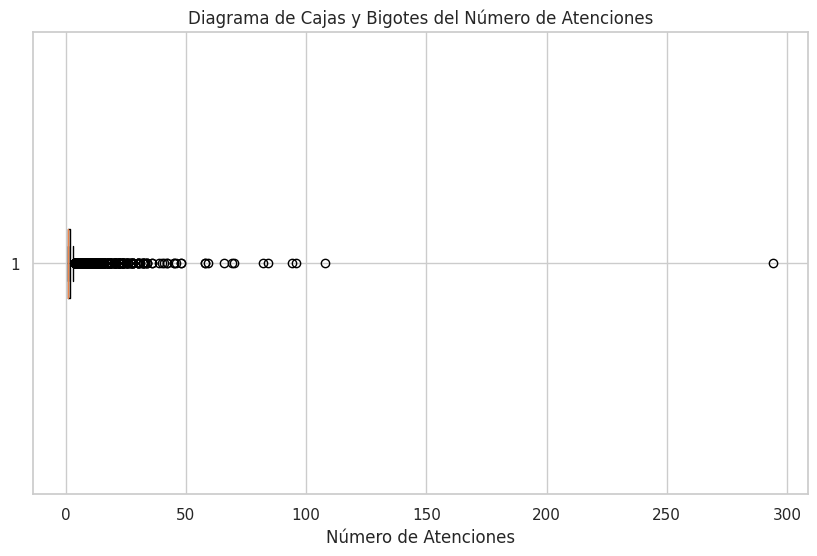

In [59]:
#Revisar que pasa con este valor atipico en un caja de bigotes

import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.boxplot(df['Número de Atenciones'], vert=False)
plt.title('Diagrama de Cajas y Bigotes del Número de Atenciones')
plt.xlabel('Número de Atenciones')
plt.grid(True)
plt.show()

**Eliminar Datos Atípicos**

Dado que el número de atenciones no hace sentido con el número de pacientes se procede a eliminar

In [60]:
#Encontrar valor máximo
valor_maximo = df['Número de Atenciones'].max()
print(valor_maximo)

294


In [61]:
#Eliminar valor máximo
df = df[df['Número de Atenciones'] != valor_maximo]

In [62]:
#Reviso de nuevos los estadísticos
print(df['Número de Atenciones'].describe())

count    20006.000000
mean         2.189893
std          3.256168
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        108.000000
Name: Número de Atenciones, dtype: float64


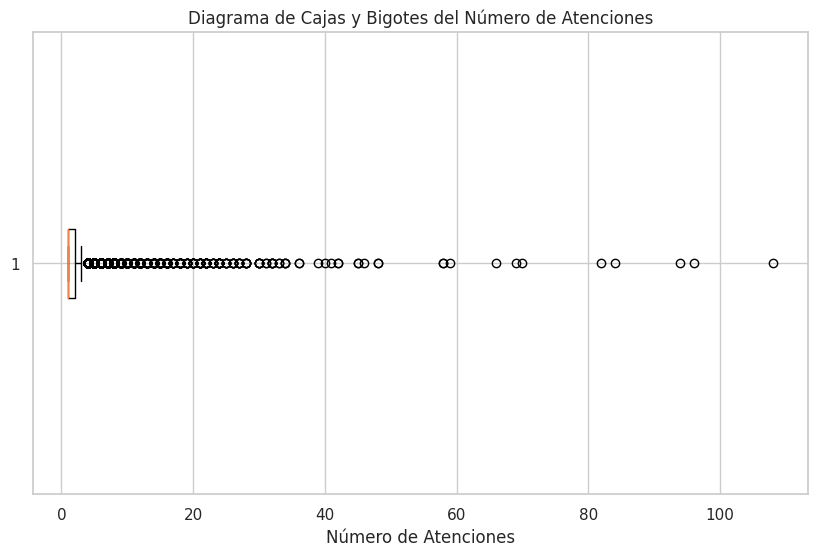

In [63]:
#Revisar que pasa con este valor atipico en un caja de bigotes

import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.boxplot(df['Número de Atenciones'], vert=False)
plt.title('Diagrama de Cajas y Bigotes del Número de Atenciones')
plt.xlabel('Número de Atenciones')
plt.grid(True)
plt.show()

In [64]:
#Reviso el núevo valor máximo
fila_max_atenciones = df[df['Número de Atenciones'] ==df['Número de Atenciones'].max()]
print(fila_max_atenciones)

          Anno  Mes    Departamento        Municipio Administradora  \
356902  2022.0  8.0  66 - Risaralda  66001 - Pereira   EPS018 - SOS   

                                 Prestador  \
356902  660010021710 - CLINICA COMFAMILIAR   

                                       Procedimiento CUPS  \
356902  360101 - ANGIOPLASTIA CORONARIA TRANSLUMINAL P...   

        Número de Atenciones  Número de Personas Atendidas  \
356902                   108                           4.0   

        Conteo de Prestadores  
356902                    1.0  


**Se dejan el número de atenciones POR MES para una persona por persona que HACEN SENTIDO en el sistema de salud**

---



Debido a la cantidada de datos atípicos se dejará el número de anteciones por personas antendidas que de acuerdo al diagnostico pueden hacer sentido en un mes, es decir **máximo 2 atenciones por persona**

In [65]:
# Asegurarte de que estás trabajando con el DataFrame original
df.loc[:, 'Atenciones por Persona'] = df['Número de Atenciones'] / df['Número de Personas Atendidas']

# Contar las filas donde 'Atenciones por Persona' es mayor a 2
num_filas_mayores_a_2 = df[df['Atenciones por Persona'] > 2].shape[0]

# Mostrar el resultado
print(f"Hay {num_filas_mayores_a_2} filas donde 'Atenciones por Persona' es mayor a 2.")


Hay 1513 filas donde 'Atenciones por Persona' es mayor a 2.


In [66]:
# Eliminar las filas donde 'Atenciones por Persona' es mayor a 2
df = df[df['Atenciones por Persona'] <= 2]

In [67]:
#Reviso de nuevos los estadísticos
print(df['Número de Atenciones'].describe())

count    18493.000000
mean         1.863408
std          2.342543
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         82.000000
Name: Número de Atenciones, dtype: float64


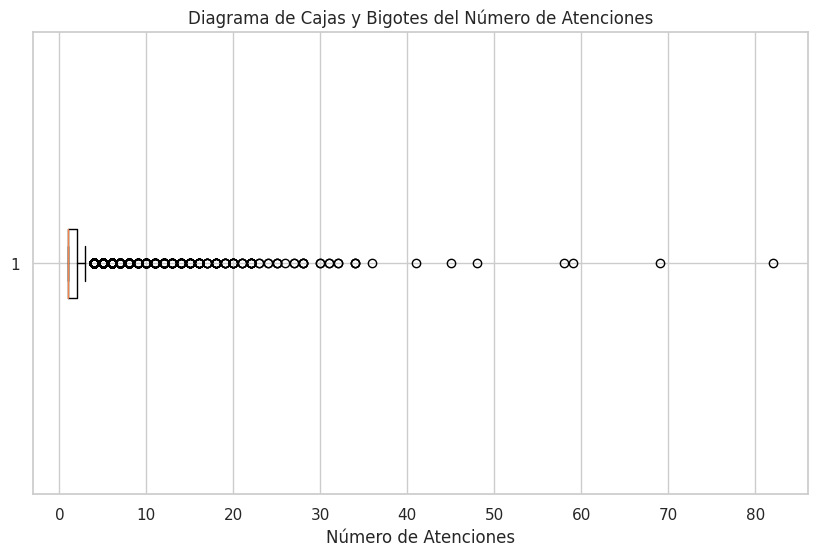

In [68]:
#Revisar que pasa con este valor atipico en un caja de bigotes

import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.boxplot(df['Número de Atenciones'], vert=False)
plt.title('Diagrama de Cajas y Bigotes del Número de Atenciones')
plt.xlabel('Número de Atenciones')
plt.grid(True)
plt.show()

**Última revisión en detalle de valores máximos**

In [69]:
#Reviso el núevo valor máximo
fila_max_atenciones = df[df['Número de Atenciones'] ==df['Número de Atenciones'].max()]
print(fila_max_atenciones)

         Anno  Mes Departamento          Municipio     Administradora  \
60299  2021.0  4.0   70 - Sucre  70001 - Sincelejo  ESS133 - COMPARTA   

                                       Prestador  \
60299  700010036501 - CLINICA SALUD SOCIAL S.A.S   

                                      Procedimiento CUPS  \
60299  360101 - ANGIOPLASTIA CORONARIA TRANSLUMINAL P...   

       Número de Atenciones  Número de Personas Atendidas  \
60299                    82                          73.0   

       Conteo de Prestadores  Atenciones por Persona  
60299                    1.0                1.123288  


**ANÁLISIS BIVARIADO**

Para el procedimiento objetivo angioplastia coronaria transluminal percutánea, se realiza en análisis de tendencia en número de procedimientos y pacientes atendidos

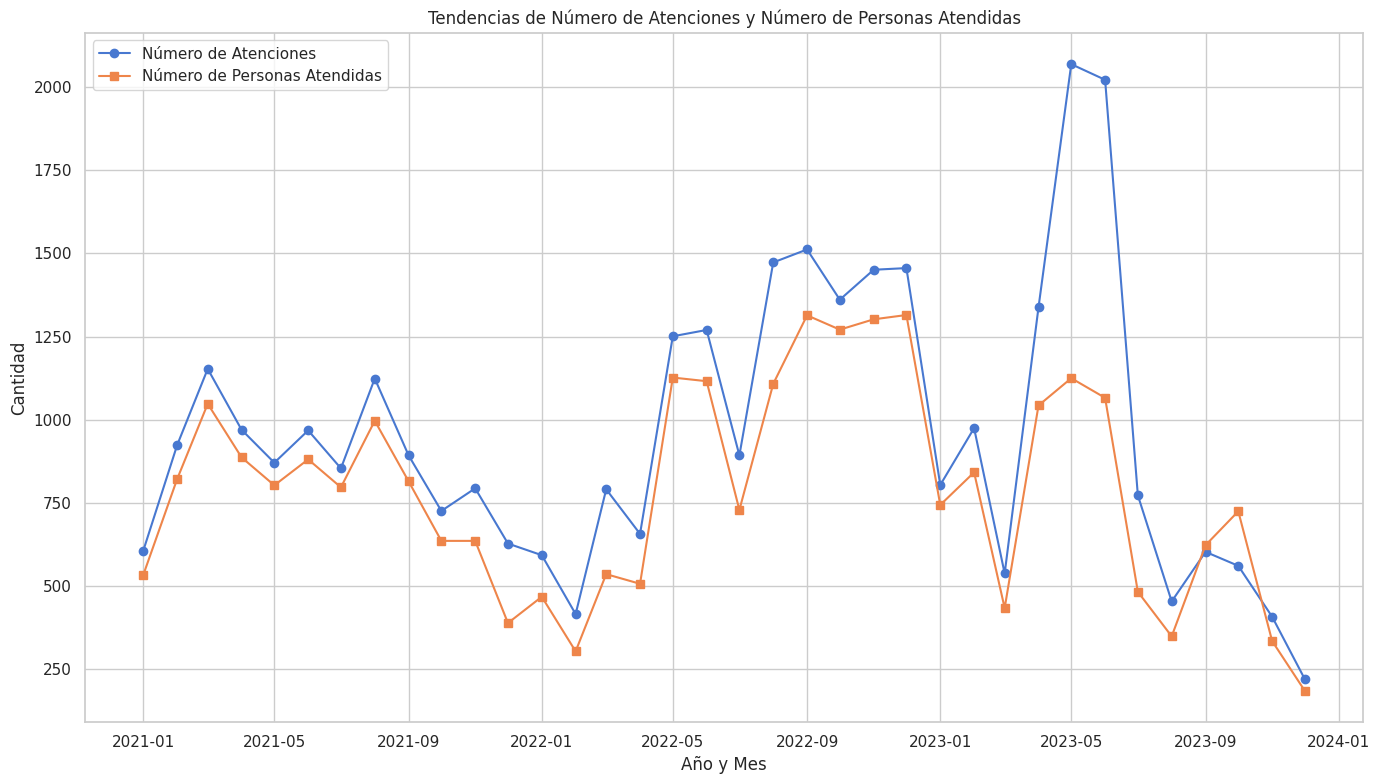

In [70]:
import matplotlib.pyplot as plt
import pandas as pd

# Filtrar el DataFrame para excluir el año 2024
df_filtrado = df[df['Anno'] != 2024].copy()

# Convertir 'Anno' y 'Mes' a enteros
df_filtrado['Anno'] = df_filtrado['Anno'].astype(int)
df_filtrado['Mes'] = df_filtrado['Mes'].astype(int)

# Crear una columna de fecha combinando 'Anno' y 'Mes'
df_filtrado['Fecha'] = pd.to_datetime(df_filtrado['Anno'].astype(str) + '-' + df_filtrado['Mes'].astype(str) + '-01', format='%Y-%m-%d')

# Agrupar por la nueva columna 'Fecha' y sumar 'Número de Atenciones' y 'Número de Personas Atendidas'
df_agrupado = df_filtrado.groupby('Fecha').sum().reset_index()

# Crear la gráfica de líneas
plt.figure(figsize=(14, 8))

# Graficar 'Número de Atenciones'
plt.plot(df_agrupado['Fecha'], df_agrupado['Número de Atenciones'], label='Número de Atenciones', marker='o')

# Graficar 'Número de Personas Atendidas'
plt.plot(df_agrupado['Fecha'], df_agrupado['Número de Personas Atendidas'], label='Número de Personas Atendidas', marker='s')

# Personalizar la gráfica
plt.title('Tendencias de Número de Atenciones y Número de Personas Atendidas')
plt.xlabel('Año y Mes')
plt.ylabel('Cantidad')
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.tight_layout()
plt.show()

**Resasaltar los picos en atenciones y personas atendidas**

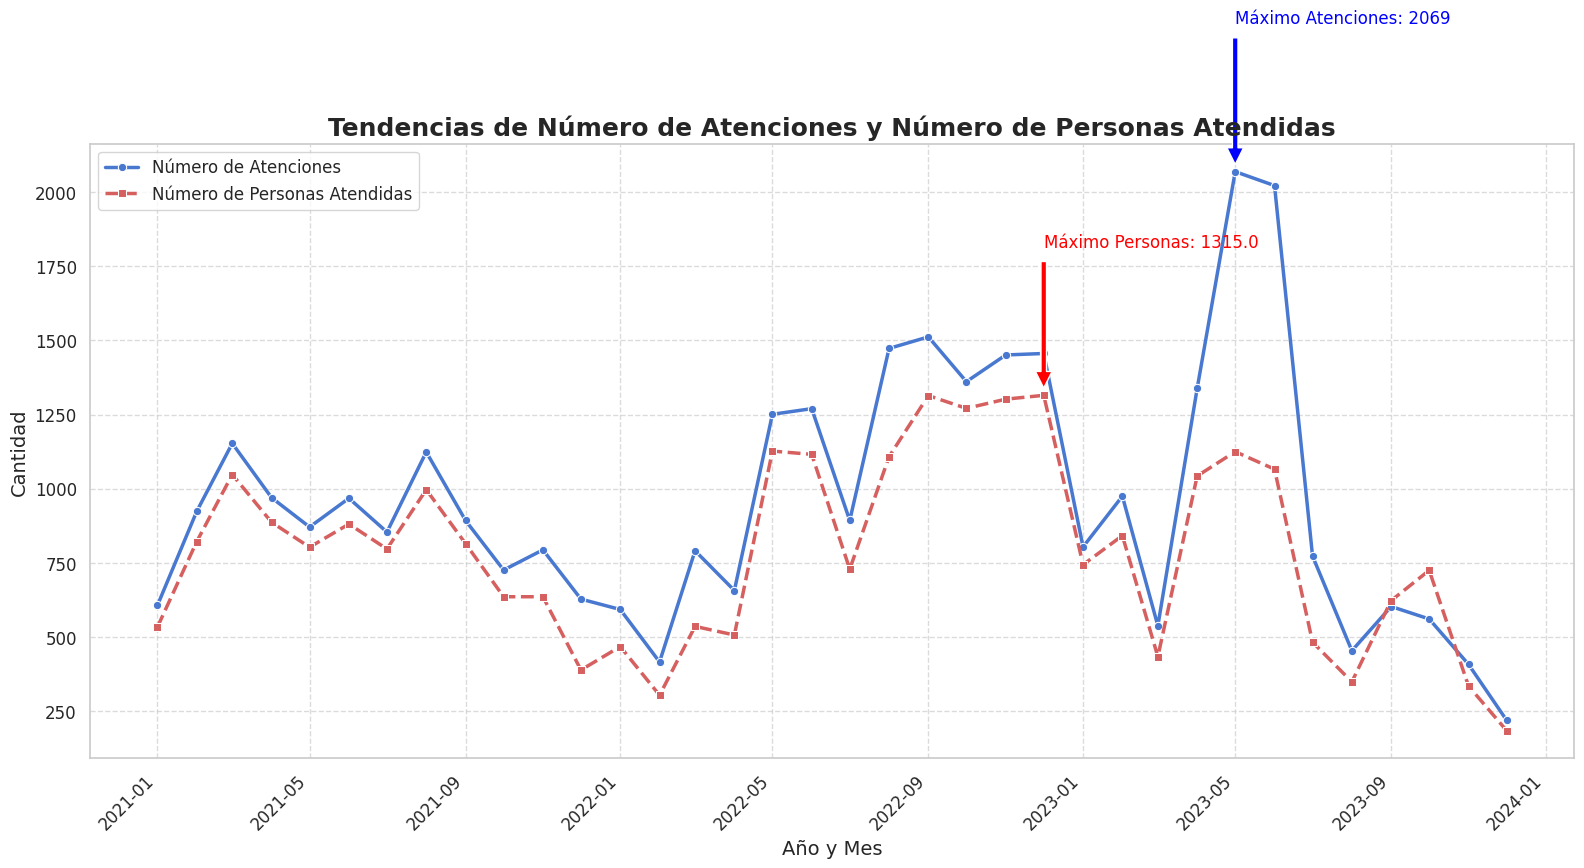

In [71]:

import seaborn as sns


# Filtrar el DataFrame para excluir el año 2024
df_filtrado = df[df['Anno'] != 2024].copy()

# Convertir 'Anno' y 'Mes' a enteros
df_filtrado['Anno'] = df_filtrado['Anno'].astype(int)
df_filtrado['Mes'] = df_filtrado['Mes'].astype(int)

# Crear una columna de fecha combinando 'Anno' y 'Mes'
df_filtrado['Fecha'] = pd.to_datetime(df_filtrado['Anno'].astype(str) + '-' + df_filtrado['Mes'].astype(str) + '-01', format='%Y-%m-%d')

# Agrupar por la nueva columna 'Fecha' y sumar 'Número de Atenciones' y 'Número de Personas Atendidas'
df_agrupado = df_filtrado.groupby('Fecha').sum().reset_index()

# Configuración del estilo de la gráfica con Seaborn
sns.set(style="whitegrid", palette="muted")

# Crear la figura y los ejes con Seaborn
plt.figure(figsize=(16, 9))

# Graficar 'Número de Atenciones'
sns.lineplot(x='Fecha', y='Número de Atenciones', data=df_agrupado, label='Número de Atenciones', marker='o', color='b', linewidth=2.5)

# Graficar 'Número de Personas Atendidas'
sns.lineplot(x='Fecha', y='Número de Personas Atendidas', data=df_agrupado, label='Número de Personas Atendidas', marker='s', color='r', linestyle='--', linewidth=2.5)

# Añadir etiquetas y título
plt.title('Tendencias de Número de Atenciones y Número de Personas Atendidas', fontsize=18, fontweight='bold')
plt.xlabel('Año y Mes', fontsize=14)
plt.ylabel('Cantidad', fontsize=14)

# Personalizar las etiquetas del eje X
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Añadir leyenda
plt.legend(fontsize=12)

# Mostrar la cuadrícula
plt.grid(True, linestyle='--', alpha=0.7)

# Añadir anotaciones en los picos
max_atenciones = df_agrupado['Número de Atenciones'].max()
max_personas = df_agrupado['Número de Personas Atendidas'].max()

plt.annotate(f'Máximo Atenciones: {max_atenciones}',
             xy=(df_agrupado['Fecha'][df_agrupado['Número de Atenciones'].idxmax()], max_atenciones),
             xytext=(df_agrupado['Fecha'][df_agrupado['Número de Atenciones'].idxmax()], max_atenciones + 500),
             arrowprops=dict(facecolor='blue', shrink=0.05),
             fontsize=12, color='blue')

plt.annotate(f'Máximo Personas: {max_personas}',
             xy=(df_agrupado['Fecha'][df_agrupado['Número de Personas Atendidas'].idxmax()], max_personas),
             xytext=(df_agrupado['Fecha'][df_agrupado['Número de Personas Atendidas'].idxmax()], max_personas + 500),
             arrowprops=dict(facecolor='red', shrink=0.05),
             fontsize=12, color='red')

# Mostrar la gráfica
plt.tight_layout()
plt.show()

**Se filtran las ciuades con más atenciones**

In [72]:
# Agrupar por Municipio (o la columna que representa la ciudad) y sumar el 'Número de Atenciones'
top_ciudades = df.groupby('Municipio')['Número de Atenciones'].sum().reset_index()

# Ordenar de forma descendente por 'Número de Atenciones'
top_ciudades = top_ciudades.sort_values(by='Número de Atenciones', ascending=False)

# Seleccionar el top 5
top_5_ciudades = top_ciudades.head(5)

# Mostrar el top 5
print(top_5_ciudades)

                Municipio  Número de Atenciones
130  11001 - Bogotá, D.C.                  5441
895          76001 - Cali                  1500
108  08001 - Barranquilla                  1335
744   68001 - Bucaramanga                   992
1        05001 - Medellín                   991


**Se gráfica del Top 5 de ciudades con más procedimientos**

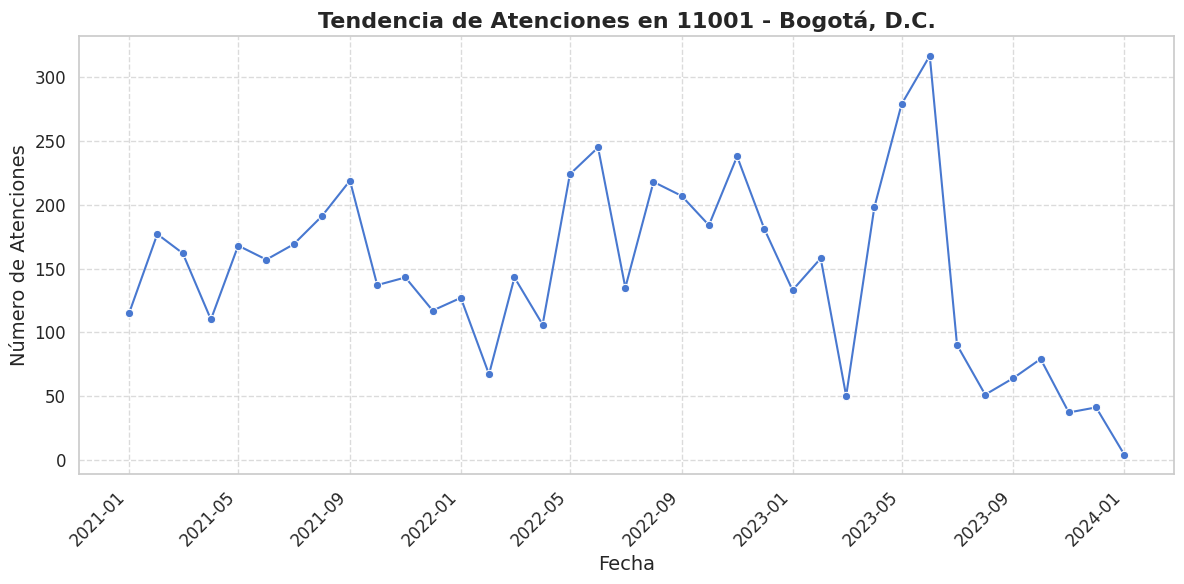

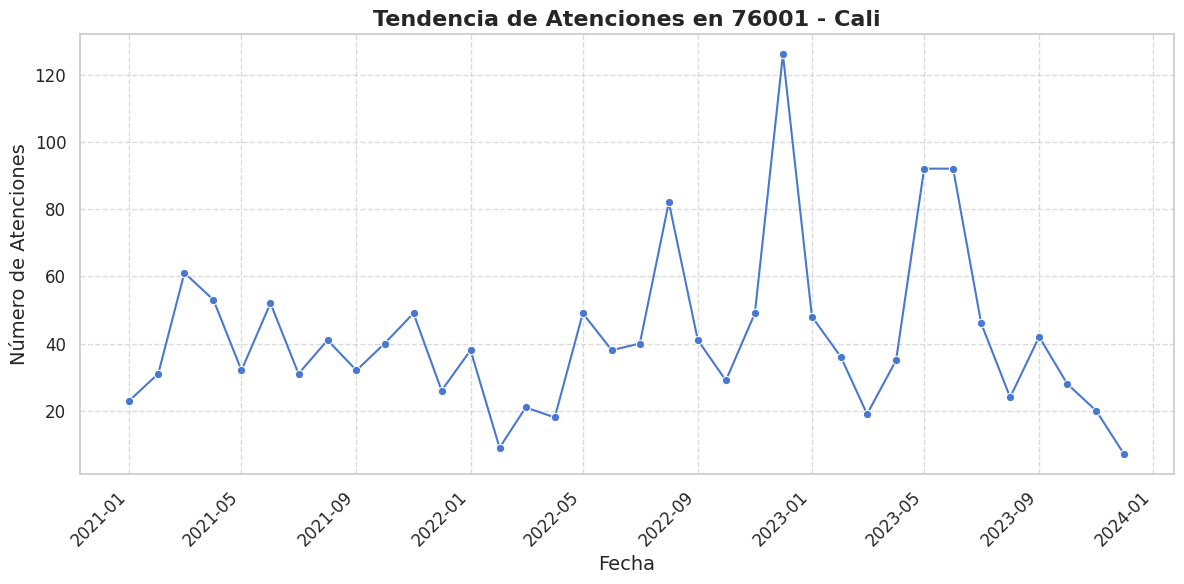

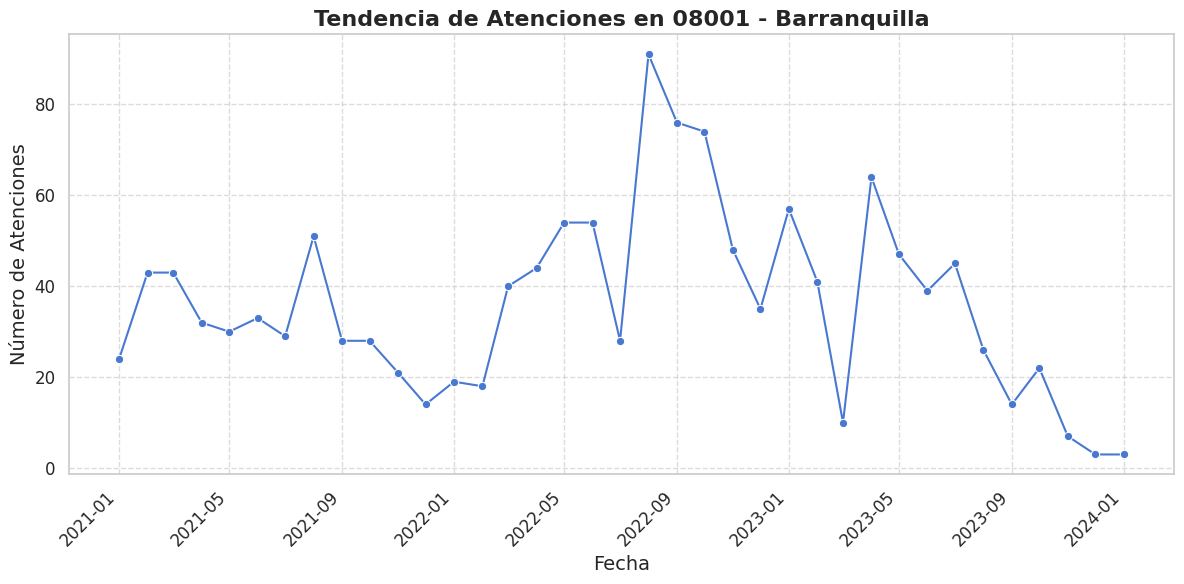

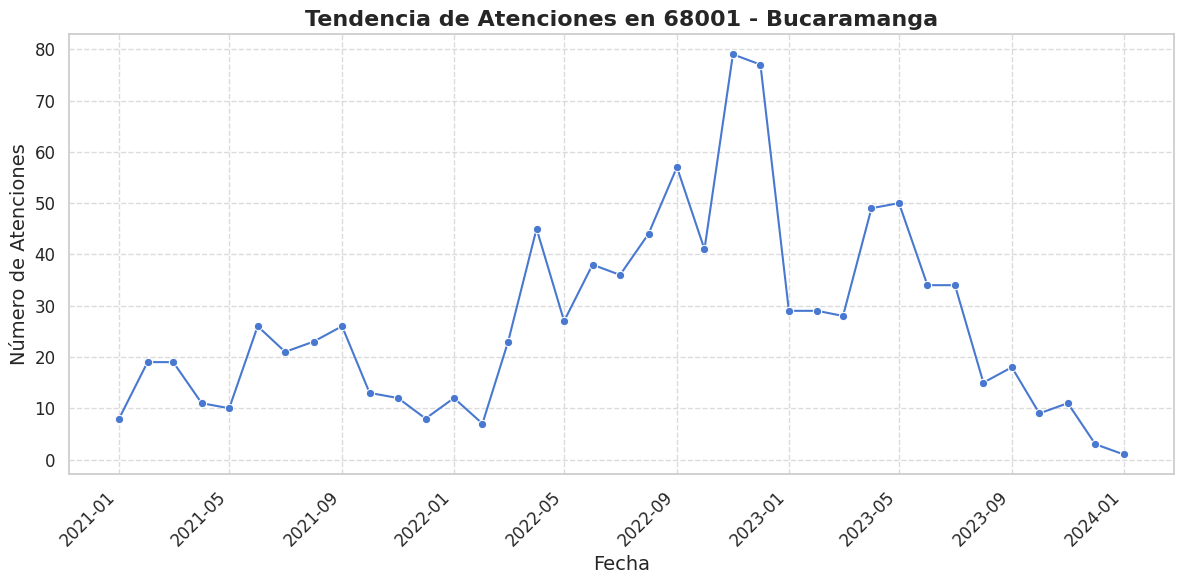

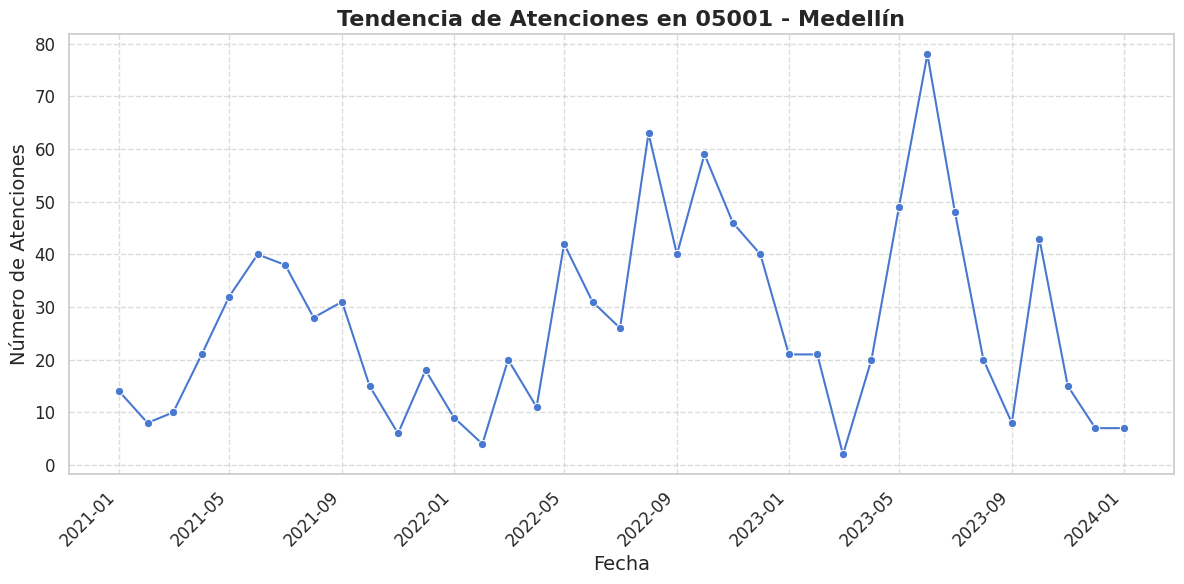

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Agrupar por Municipio (o la columna que representa la ciudad) y sumar el 'Número de Atenciones'
top_ciudades = df.groupby('Municipio')['Número de Atenciones'].sum().reset_index()

# Ordenar de forma descendente por 'Número de Atenciones' y seleccionar el top 5
top_5_ciudades = top_ciudades.sort_values(by='Número de Atenciones', ascending=False).head(5)

# Filtrar el DataFrame original para incluir solo las ciudades del top 5
df_top_5 = df[df['Municipio'].isin(top_5_ciudades['Municipio'])]

# Crear una gráfica para cada ciudad usando Seaborn
for ciudad in top_5_ciudades['Municipio']:
    # Filtrar los datos para la ciudad actual
    df_ciudad = df_top_5[df_top_5['Municipio'] == ciudad].copy()

    # Convertir 'Anno' y 'Mes' a enteros
    df_ciudad['Anno'] = df_ciudad['Anno'].astype(int)
    df_ciudad['Mes'] = df_ciudad['Mes'].astype(int)

    # Crear una columna de fecha combinando 'Anno' y 'Mes'
    df_ciudad['Fecha'] = pd.to_datetime(df_ciudad['Anno'].astype(str) + '-' + df_ciudad['Mes'].astype(str) + '-01', format='%Y-%m-%d')

    # Agrupar por la nueva columna 'Fecha' y sumar 'Número de Atenciones'
    df_ciudad_agrupado = df_ciudad.groupby('Fecha')['Número de Atenciones'].sum().reset_index()

    # Crear la gráfica con Seaborn
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='Fecha', y='Número de Atenciones', data=df_ciudad_agrupado, marker='o', color='b')

    # Añadir título y etiquetas
    plt.title(f'Tendencia de Atenciones en {ciudad}', fontsize=16, fontweight='bold')
    plt.xlabel('Fecha', fontsize=14)
    plt.ylabel('Número de Atenciones', fontsize=14)

    # Personalizar las etiquetas del eje X
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.yticks(fontsize=12)

    # Mostrar la cuadrícula
    plt.grid(True, linestyle='--', alpha=0.7)

    # Mostrar la gráfica
    plt.tight_layout()
    plt.show()

**Correlación número de atenciones y personas atendidas**

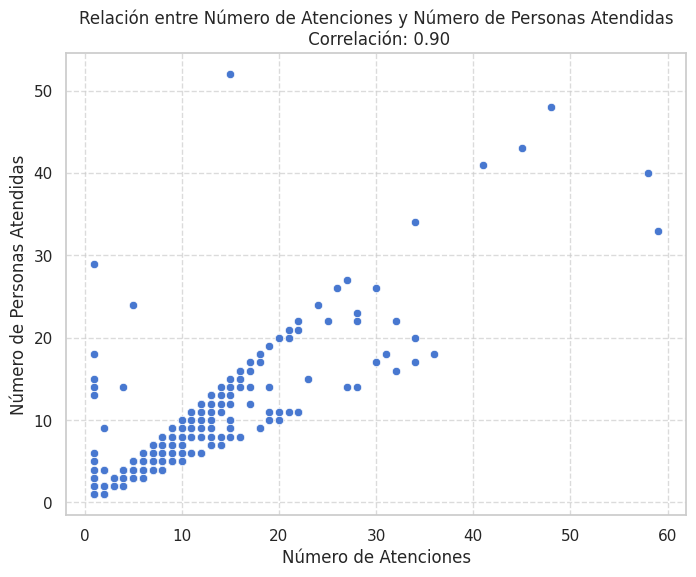

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la correlación
correlacion = df_top_5[['Número de Atenciones', 'Número de Personas Atendidas']].corr()

# Visualizar la relación con un gráfico de dispersión
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Número de Atenciones', y='Número de Personas Atendidas', data=df_top_5)
plt.title(f'Relación entre Número de Atenciones y Número de Personas Atendidas\n Correlación: {correlacion.iloc[0,1]:.2f}')
plt.xlabel('Número de Atenciones')
plt.ylabel('Número de Personas Atendidas')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

**Se gráfica la distribuación de Número de atenciones en el Top 5 de Ciudades**

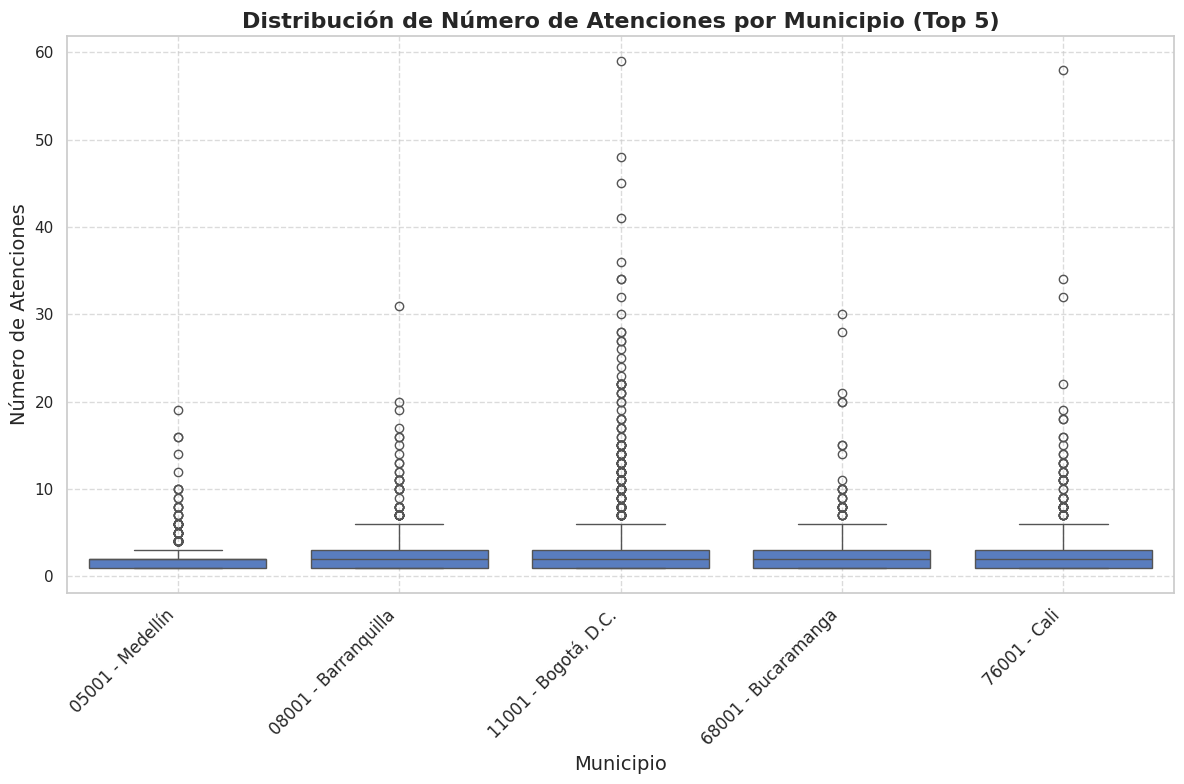

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar el DataFrame original para incluir solo las ciudades del top 5
df_top_5 = df_top_5[df_top_5['Municipio'].isin(top_5_ciudades['Municipio'])]

# Gráfico de caja para comparar la distribución de atenciones por municipio en el top 5
plt.figure(figsize=(12, 8))
sns.boxplot(x='Municipio', y='Número de Atenciones', data=df_top_5)

# Añadir título y etiquetas
plt.title('Distribución de Número de Atenciones por Municipio (Top 5)', fontsize=16, fontweight='bold')
plt.xlabel('Municipio', fontsize=14)
plt.ylabel('Número de Atenciones', fontsize=14)

# Personalizar las etiquetas del eje X
plt.xticks(rotation=45, ha='right', fontsize=12)

# Mostrar la cuadrícula
plt.grid(True, linestyle='--', alpha=0.7)

# Mostrar la gráfica
plt.tight_layout()
plt.show()

**Gráfica de correlación entre variables**

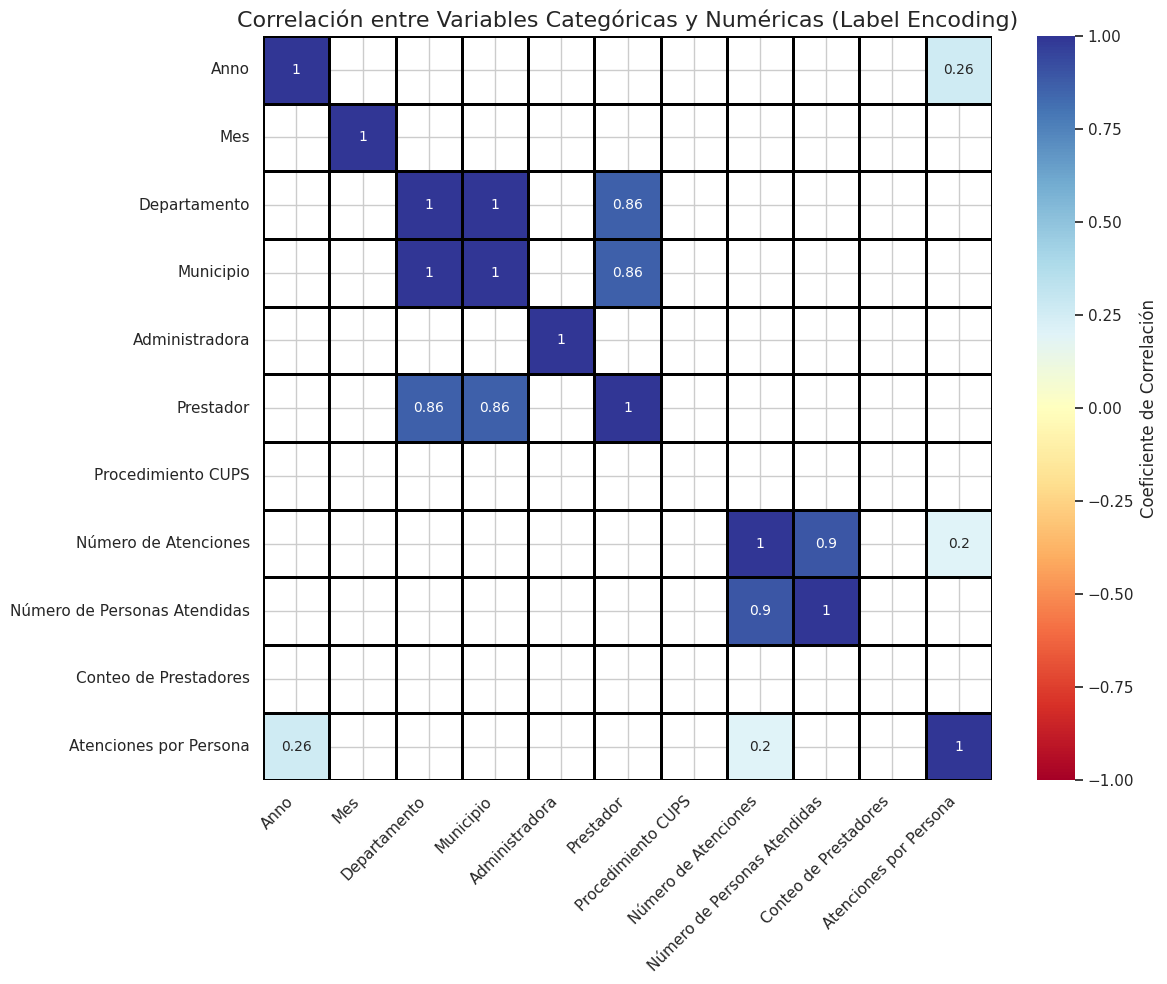

In [76]:
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Crear una copia del DataFrame para codificar
df_label_encoded = df_top_5.copy()

# Aplicar Label Encoding a las variables categóricas
label_encoders = {}
categorical_columns = ['Departamento', 'Municipio', 'Administradora', 'Prestador', 'Procedimiento CUPS']

for column in categorical_columns:
    le = LabelEncoder()
    df_label_encoded[column] = le.fit_transform(df_label_encoded[column])
    label_encoders[column] = le  # Guardar el codificador por si necesitas revertirlo

# Calcular la matriz de correlación
corr_matrix_label_encoded = df_label_encoded.corr()

#Se Filtran las correlaciones no significativas, para este caso menores a 0.1
mask = np.abs(corr_matrix_label_encoded) < 0.1

# Visualizar la matriz de correlación
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(corr_matrix_label_encoded, annot=True, cmap='RdYlBu', linewidths=1, linecolor='black',
                      mask=mask, vmin=-1, vmax=1, annot_kws={"size": 10})

# Rotar etiquetas para mejorar la legibilidad
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Añadir título descriptivo
plt.title('Correlación entre Variables Categóricas y Numéricas (Label Encoding)', fontsize=16)

# Añadir barra de color con título
cbar = heatmap.collections[0].colorbar
cbar.set_label('Coeficiente de Correlación')

# Mostrar la gráfica
plt.tight_layout()
plt.show()

**CONCLUSIONES :**

**Análisis de Tendencia:**
Al final de cada año se identifica una caída de las atenciones y por lo tanto personas atendidas.
Al inicio de cada año hay una tendencia creciente en las atenciones

**Comparativo en el top 5 de las ciudades**

Hay un alza en las diferentes ciudades de los procedimientos realzizdos para el 2023


**Correlación Número de Atenciones y Número de Personas Atendidas:**
Correlación Alta --> Era de Esperarse
Distribución de los datos : Denso en la parte inferior, es decir, bajo número de atención al igual que personas atendidas
Aunque la correlación es alta a medidas que aumenta el número de atenciones, también aumenta la dispersión de puntos

***Atenciones por municipio:***
Bucaramanga tiene una distribución de atenciones similar, pero con menos outliers en comparación con las demás ciudades.
Bogotá D.C. y Cali parecen tener una mayor dispersión de outliers, con algunos valores que llegan hasta 30 o más atenciones en un solo caso.


***Correlaciones entre variables***

Correlacioenes Fuertes :
Número de Atenciones y Número de Personas Atendidas
Prestador y Municipio/Departamento
Redundancia de variables: La alta correlación entre Municipio y Departamento sugiere que podría haber redundancia en el uso de estas variables en un modelo predictivo. Es posible que solo una de ellas sea necesaria para capturar la misma información.




**TALLER 4**

**Procesamiento de Carácteristicas**


* Creación de cáracteristica temporal con Año y Mes.

* Nomalizar: Normalizar "Número de Atenciones" para que el modelo pueda trabajar más fácilmente con los valores.

* Crear variable  lag para tener en cuenta el periodo-1.

* Aplicar Hot Encoding con la creación de variables

**Normalización de Datos --> No se usa en el Modelo**

Dado que el modelo va a ser una serie de tiempos, para este escenario no es necesario normalizar datos, por lo tanto este paso se omite



**Creación de carácteristica Fecha con Año y Mes**

Se crea un campo fecha de tipo datatime para usar en la serie de tiempo con los campos de Mes y Año


In [77]:
print(df_top_5.dtypes)
print( df_top_5['Anno'].unique())
print( df_top_5['Mes'].unique())

Anno                            float64
Mes                             float64
Departamento                     object
Municipio                        object
Administradora                   object
Prestador                        object
Procedimiento CUPS               object
Número de Atenciones              int64
Número de Personas Atendidas    float64
Conteo de Prestadores           float64
Atenciones por Persona          float64
dtype: object
[2021. 2022. 2023. 2024.]
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12.]


In [78]:
from IPython.display import display
# Convertir Anno y Mes a enteros
df_top_5['Anno'] = df_top_5['Anno'].astype(int)
df_top_5['Mes'] = df_top_5['Mes'].astype(int)

# Crear un DataFrame temporal con las columnas etiquetadas como 'year', 'month', 'day'
temp_df = df_top_5[['Anno', 'Mes']].rename(columns={'Anno': 'year', 'Mes': 'month'})
temp_df['day'] = 1  # Asignar el primer día del mes

# Generar las fechas combinando 'year', 'month' y 'day'
df_top_5['Fecha'] = pd.to_datetime(temp_df)

print(df_top_5.dtypes)

# Mostrar el DataFrame resultante

display(df_top_5.head(3))


Anno                                     int64
Mes                                      int64
Departamento                            object
Municipio                               object
Administradora                          object
Prestador                               object
Procedimiento CUPS                      object
Número de Atenciones                     int64
Número de Personas Atendidas           float64
Conteo de Prestadores                  float64
Atenciones por Persona                 float64
Fecha                           datetime64[ns]
dtype: object


,Anno,Mes,Departamento,Municipio,Administradora,Prestador,Procedimiento CUPS,Número de Atenciones,Número de Personas Atendidas,Conteo de Prestadores,Atenciones por Persona,Fecha
108,2021,1,05 - Antioquia,05001 - Medellín,EMP028 - SALUD COOMEVA MEDICINA PREPAGADA S. A.,050010209201 - CLINICA EL ROSARIO SEDE CENTRO,360101 - ANGIOPLASTIA CORONARIA TRANSLUMINAL P...,1,1.0,1.0,1.0,2021-01-01
246,2021,1,05 - Antioquia,05001 - Medellín,EPS016 - COOMEVA,050010217203 - CLINICA MEDELLIN OCCIDENTE,360101 - ANGIOPLASTIA CORONARIA TRANSLUMINAL P...,2,1.0,1.0,2.0,2021-01-01
258,2021,1,05 - Antioquia,05001 - Medellín,EPS040 - SAVIA SALUD EPS,050010214401 - HOSPITAL GENERAL DE MEDELLÍN LU...,360101 - ANGIOPLASTIA CORONARIA TRANSLUMINAL P...,1,1.0,1.0,1.0,2021-01-01


**Creación de variable Lag, para tener periodo -1**

Se omite este paso dado que para el modelo ARIMA no se ve la necesidad del mismo

**Aplicación de OneHotEncode**
Se omite el paso de OneHotEncode dado que para el modelo ARIMA no se ve la necesidad del mismo

**TALLER 5 : APLICACIÓN DEL MODELO**

Dado que sond datos que tienen estrucutra de serie de tiempo, registrando número de atenciones mes a mes de manera secuencial, lo cual pudiese generar patrones y tendencias por lo que se alcanzó a visualizar en el análisis descriptivo. Para validar si se puede aplicar ARIMA se verificarán los siguientes pasos
1. Estacionariedad de los Datos
2. Componentes del Modelo ARIMA (p,d,q)
3.  Identificaciónd de p, d, q con PACF
4.  Estaccionalidad
5.  Selección del mejor Modelo
6.  Evaluación del modelo
7.  Preducción y proyección



**MODELO ARIMA**

**PASO 1 : Verificar Estacionariedad --> Dickey-Fuller**

In [79]:
from statsmodels.tsa.stattools import adfuller

# Establecer la columna 'Fecha' como índice del DataFrame
df_top_5.set_index('Fecha', inplace=True)

# Se convierte número de atenciones en serie de interés
series = df_top_5['Número de Atenciones']

# Prueba de Dickey-Fuller
result = adfuller(series.dropna())
print(f'Estadístico ADF: {result[0]}')
print(f'Valor p: {result[1]:.15f}')

if result[1] > 0.05:
    print("Los datos no son estacionarios, se requiere diferenciación.")
else:
    print("Los datos son estacionarios.")


Estadístico ADF: -32.60523853758912
Valor p: 0.000000000000000
Los datos son estacionarios.




**Prueba de Dickey-Fuller**: Mide qué tan fuertemente una serie temporal es estacionaria. Cuanto más negativo sea este valor, mayor es la evidencia de que la serie es estacionaria. Un **valor tan bajo como -32.60** indica una fuerte **EVIDENCIA DE ESTACIONARIEDAD EN LOS DATOS**.

**Valor p:** El valor p es el resultado clave para determinar si rechazamos o no la hipótesis nula de la prueba. La hipótesis nula de la prueba ADF es que la serie tiene una raíz unitaria, lo que implica que no es estacionaria.
**Valor p = 0.0** siendo  mucho menor que el umbral común de significancia (0.05 o 5%), lo que significa que podemos rechazar la hipótesis nula y concluir que los datos son estacionarios.


**PASO 2 : Identificar los Parámetros p y q con ACF y PACF**

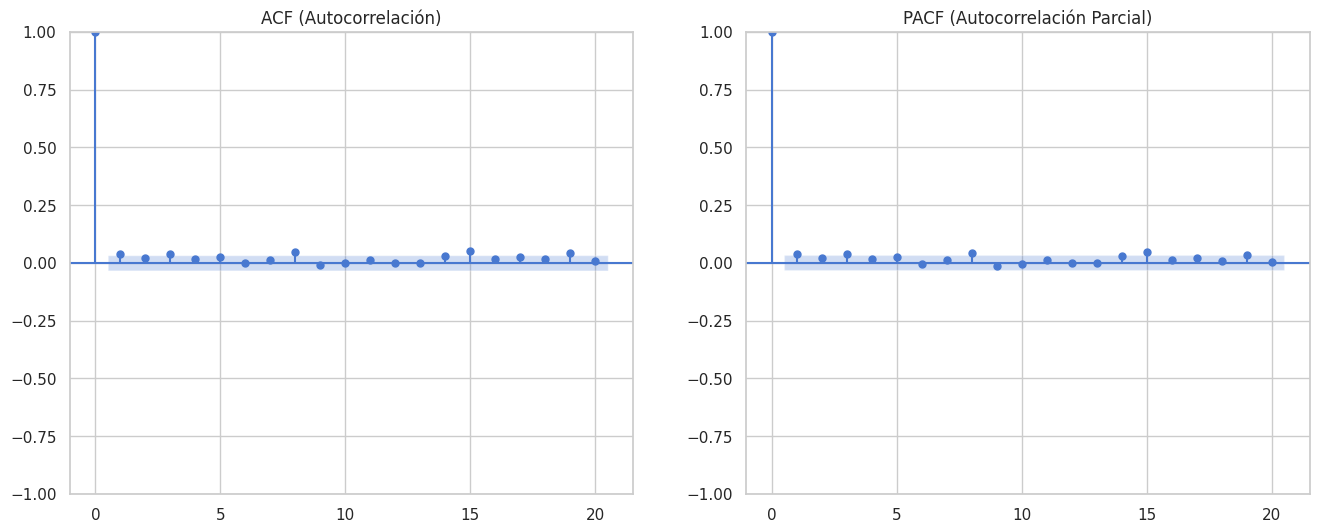

In [80]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Graficar ACF y PACF
fig, axes = plt.subplots(1, 2, figsize=(16,6))

# ACF: Identificar el valor de q
plot_acf(series.dropna(), lags=20, ax=axes[0])
axes[0].set_title('ACF (Autocorrelación)')

# PACF: Identificar el valor de p
plot_pacf(series.dropna(), lags=20, ax=axes[1])
axes[1].set_title('PACF (Autocorrelación Parcial)')

plt.show()

**ACF**  Autocorrelation Function:
Solo el lag 1 es significativo, lo que indica que no hay correlaciones importantes después de ese punto.
* **Q=0 es adecuado**, ya que no necesitas incluir términos de media móvil adicionales.

**PACF**  Partial Autocorrelation Function:
El lag 1 también es significativo, pero no hay correlaciones importantes después.
* **P=0 es apropiado**, sin necesidad de términos autoregresivos adicionales.

**PASO 3 : Construcción del MODELO ARIMA**

* *Datos son estacionarios d=0**
* **Las gráficas de ACF y PACF sugieren que no hay correlaciones significativas en los lags más allá del primer lag**
* **Modelo Inicial** --> ARIMA(0, 0, 0).

**NECESARIO PARA ARIMA --> AGRUPAR FECHAS DUPLICADAS**

Para poder aplicar el modelo ARIMA es necesario hacer tratamiento de las fechas duplicadas

In [81]:
# Identificar si hay duplicados en el índice
duplicates = df_top_5.index[df_top_5.index.duplicated()]
print(f"Fechas duplicadas en el índice:\n{duplicates}")


Fechas duplicadas en el índice:
DatetimeIndex(['2021-01-01', '2021-01-01', '2021-01-01', '2021-01-01',
               '2021-01-01', '2021-01-01', '2021-01-01', '2021-01-01',
               '2021-01-01', '2021-01-01',
               ...
               '2024-01-01', '2024-01-01', '2024-01-01', '2024-01-01',
               '2024-01-01', '2024-01-01', '2024-01-01', '2024-01-01',
               '2024-01-01', '2024-01-01'],
              dtype='datetime64[ns]', name='Fecha', length=3594, freq=None)


**ACLICACIÓN DE ARIMA (0,0,0)**

In [82]:
from statsmodels.tsa.arima.model import ARIMA

# Agrupar por fecha y sumar los valores de las filas duplicadas
df_top_5 = df_top_5.groupby(df_top_5.index).sum()

# Asignar la frecuencia mensual ('MS' significa "Start of Month")
df_top_5 = df_top_5.asfreq('MS')

# Extraer la serie de interés
series = df_top_5['Número de Atenciones']

# Ajustar el modelo ARIMA con p=0, d=0, q=0
model = ARIMA(series, order=(0, 0, 0))
model_fit = model.fit()

# Mostrar un resumen del modelo ajustado
print(model_fit.summary())

                                SARIMAX Results                                 
Dep. Variable:     Número de Atenciones   No. Observations:                   37
Model:                            ARIMA   Log Likelihood                -232.461
Date:                  Sun, 08 Sep 2024   AIC                            468.923
Time:                          23:20:13   BIC                            472.145
Sample:                      01-01-2021   HQIC                           470.059
                           - 01-01-2024                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        277.2703     21.553     12.864      0.000     235.027     319.514
sigma2      1.677e+04   4530.594      3.703      0.000    7894.803    2.57e+04
Ljung-Box (L1) (Q):                 

* const = Número de atenciones estimadas promedio 277
* sigma2 = 16770 alta varianza en los residuos
* AIC = 468 y  BIC  = 472 -->  Muy altos, el modelo no es optimo
* Ljung-Box Test (Q) = 13.34 autocorrelación significativa en los residuos, probar con otro modelo
* Jarque-Bera = 0,58 los residuos no se desvían significativamente de la normalidad
* Heterocdasticidad = 11,49 heterocdasticidad significativa --> La varianza de los errores cambia en el tiempo


La serie es estacionaria --> Como se vio con la prueba ADF.
* **El modelo ARIMA(0, 0, 0) es demasiado simple** para **capturar la estructura de los datos**, incluso si son estacionarios.
* **Un modelo más complejo**

**ARIMA(0,1,0)**

In [88]:
# Ajustar ARIMA con diferenciación (d=1)
model = ARIMA(series, order=(0, 1, 0))  # d=1 para diferenciar
model_fit = model.fit()

# Mostrar el resumen del modelo ajustado
print(model_fit.summary())

                                SARIMAX Results                                 
Dep. Variable:     Número de Atenciones   No. Observations:                   37
Model:                   ARIMA(0, 1, 0)   Log Likelihood                -220.795
Date:                  Sun, 08 Sep 2024   AIC                            443.591
Time:                          23:45:00   BIC                            445.174
Sample:                      01-01-2021   HQIC                           444.144
                           - 01-01-2024                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.243e+04   2589.124      4.803      0.000    7359.838    1.75e+04
Ljung-Box (L1) (Q):                   0.54   Jarque-Bera (JB):                 0.53
Prob(Q):                       

* sigma² = 12,430, alta varianza en los residuos.
* AIC = 443 y BIC = 445 → Los valores no son óptimos, sugieren que el modelo es muy básico.
* Ljung-Box Test (Q) = 0.54, sin autocorrelación significativa en los residuos.
* Jarque-Bera = 0.53, los residuos no se desvían significativamente de la normalidad.
* Heterocedasticidad = 7.23, heterocedasticidad significativa → La varianza de los errores cambia en el tiempo.

**Continua la alta varianza residual y la heterocedasticidad sugieren que un modelo más complejo podría mejorar el ajuste.**

**ARIMA(1,1,1)**

In [89]:
# Ajustar ARIMA(1, 1, 1)
model = ARIMA(series, order=(1, 1, 1))
model_fit = model.fit()

# Mostrar el resumen del modelo ajustado
print(model_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                                SARIMAX Results                                 
Dep. Variable:     Número de Atenciones   No. Observations:                   37
Model:                   ARIMA(1, 1, 1)   Log Likelihood                -219.034
Date:                  Sun, 08 Sep 2024   AIC                            444.069
Time:                          23:57:54   BIC                            448.819
Sample:                      01-01-2021   HQIC                           445.727
                           - 01-01-2024                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6956      0.201      3.464      0.001       0.302       1.089
ma.L1         -0.9985      3.918     -0.255      0.799      -8.677       6.680
sigma2      1.067e+04   4.09e+04    

* ar.L1 = 0.6956 → El término autoregresivo es significativo (p-valor de 0.001), lo que sugiere que la información pasada es útil para predecir el valor actual.
* ma.L1 = -0.9985 → El término de media móvil no es significativo (p-valor de 0.799), lo que indica que los errores pasados no aportan información adicional para mejorar la predicción.
* sigma² = 10,670 → La varianza residual es similar al modelo anterior, lo que indica que la precisión del modelo en cuanto a la variabilidad de los datos no ha mejorado significativamente.
* AIC = 444 y BIC = 449 → Estos valores son similares al modelo ARIMA(0, 1, 0), lo que sugiere que no hay una mejora significativa en la calidad del ajuste.
* Ljung-Box Test (Q) = 0.03 → No hay autocorrelación significativa en los residuos, lo cual es positivo para la validez del modelo.
* Jarque-Bera = 0.31 → Los residuos no se desvían significativamente de la normalidad (p-valor de 0.86).
* Heterocedasticidad (H) = 7.78 → Todavía hay heterocedasticidad significativa, lo que indica que la varianza de los errores no es constante a lo largo del tiempo.

El **modelo ARIMA(1, 1, 1) tiene un término autoregresivo significativo**, pero **la mejora respecto al ARIMA(0, 1, 0) no es sustancial** en términos de AIC, BIC,**o varianza residual**. Además, la heterocedasticidad persiste.

**APLICACIÓN DE SARIMA**
**SARIMA(1, 1, 1)(1, 1, 1, 12)**

In [90]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Ajustar SARIMA con estacionalidad (p,d,q) = (1, 1, 1) y (P,D,Q,m) = (1, 1, 1, 12)
model = SARIMAX(series, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit()

# Mostrar el resumen del modelo ajustado
print(model_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:               Número de Atenciones   No. Observations:                   37
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -152.369
Date:                            Mon, 09 Sep 2024   AIC                            314.738
Time:                                    00:02:11   BIC                            320.628
Sample:                                01-01-2021   HQIC                           316.301
                                     - 01-01-2024                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3753      0.665      0.565      0.572      -0.928       1.678
ma.L1         -0.6751      0.695   

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


La convergencia no se logró completamente, lo que puede significar que el modelo tiene dificultades para ajustarse correctamente a los datos. Esto puede deberse a la complejidad del modelo o a la falta de información en los datos para capturar los efectos estacionales de manera adecuada.

El modelo SARIMA muestra un AIC y BIC más bajos que los modelos ARIMA simples, lo que sugiere un mejor ajuste.

* Ninguno de los parámetros autoregresivos o de media móvil, tanto estacionales como no estacionales, es significativo.

* **La advertencia de convergencia indica que el modelo podría no estar completamente optimizado**.

**APLICACIÓN DE SARIMA**
* **SARIMA(1, 1, 1)(1, 1, 1, 12)**

In [91]:
model = SARIMAX(series, order=(0, 1, 0), seasonal_order=(0, 1, 1, 12))
model_fit = model.fit()
print(model_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                      SARIMAX Results                                       
Dep. Variable:                 Número de Atenciones   No. Observations:                   37
Model:             SARIMAX(0, 1, 0)x(0, 1, [1], 12)   Log Likelihood                -153.551
Date:                              Mon, 09 Sep 2024   AIC                            311.102
Time:                                      00:06:37   BIC                            313.458
Sample:                                  01-01-2021   HQIC                           311.727
                                       - 01-01-2024                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12      -0.7658      1.657     -0.462      0.644      -4.013       2.482
sigma2      1.529e+

Aunque **el término de media móvil estacional no es significativo**, el modelo SARIMA(0, 1, 0)(0, 1, 1, 12) **presenta los mejores valores de AIC y BIC hasta ahora**, lo que indica que **tiene el mejor ajuste global**.
N**o hay autocorrelación ni problemas con la normalidad de los residuos**

* **Viabilidad del modelo**.

**Realización del Prónostico con el modelo encontrado**
* SARIMA(1, 1, 1)(1, 1, 1, 12)

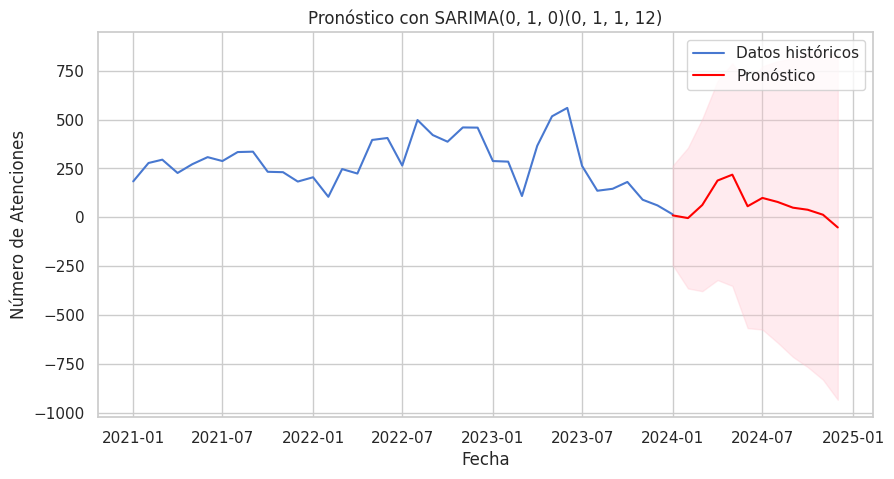

In [94]:
# Realizar pronósticos con el modelo ajustado
forecast = model_fit.get_forecast(steps=12)  # Pronosticar 12 meses hacia adelante
forecast_index = pd.date_range(start=series.index[-1], periods=12, freq='MS')  # Crear índice para las fechas pronosticadas

# Obtener los valores pronosticados y los intervalos de confianza
forecast_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Visualizar los resultados
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(series.index, series, label='Datos históricos')
plt.plot(forecast_index, forecast_values, label='Pronóstico', color='red')
plt.fill_between(forecast_index, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1],
                 color='pink', alpha=0.3)
plt.title('Pronóstico con SARIMA(0, 1, 0)(0, 1, 1, 12)')
plt.xlabel('Fecha')
plt.ylabel('Número de Atenciones')
plt.legend()
plt.show()

**Evitar prónosticar valores negativos** con una transformación Logaritmica

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


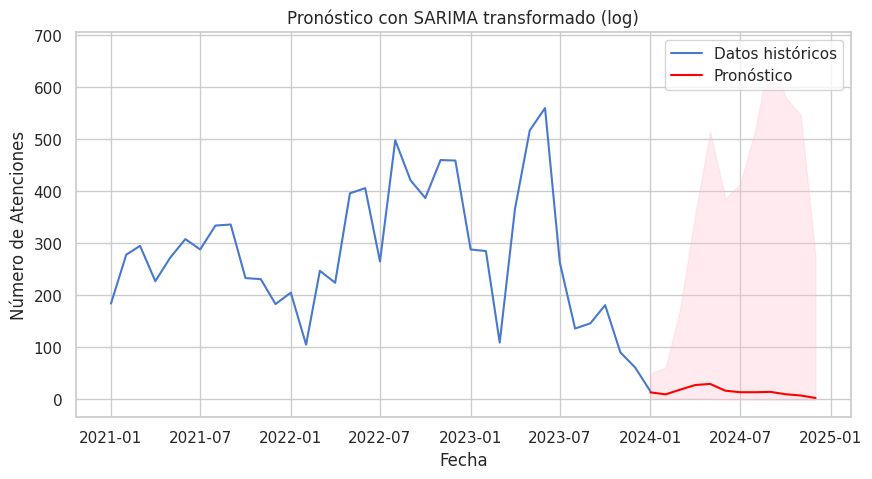

In [95]:
# 1. Aplicar la transformación logarítmica a la serie
series_log = np.log(series + 1)  # Se suma 1 para evitar log(0)

# 2. Ajustar el modelo SARIMA en los datos transformados
model_log = SARIMAX(series_log, order=(0, 1, 0), seasonal_order=(0, 1, 1, 12))
model_log_fit = model_log.fit()

# 3. Realizar los pronósticos (12 pasos hacia adelante)
forecast_log = model_log_fit.get_forecast(steps=12)
forecast_values_log = forecast_log.predicted_mean

# Revertir la transformación logarítmica (volviendo a la escala original)
forecast_values = np.exp(forecast_values_log) - 1

# Obtener los intervalos de confianza
confidence_intervals_log = forecast_log.conf_int()
confidence_intervals = np.exp(confidence_intervals_log) - 1

# 4. Visualización
import matplotlib.pyplot as plt

forecast_index = pd.date_range(start=series.index[-1], periods=12, freq='MS')
plt.figure(figsize=(10, 5))
plt.plot(series.index, series, label='Datos históricos')
plt.plot(forecast_index, forecast_values, label='Pronóstico', color='red')
plt.fill_between(forecast_index, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1],
                 color='pink', alpha=0.3)
plt.title('Pronóstico con SARIMA transformado (log)')
plt.xlabel('Fecha')
plt.ylabel('Número de Atenciones')
plt.legend()
plt.show()

Se observa un **intervalo de confianza** muy amplio

**DISMINUCIÓN DE NÚMERO DE MESES**

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


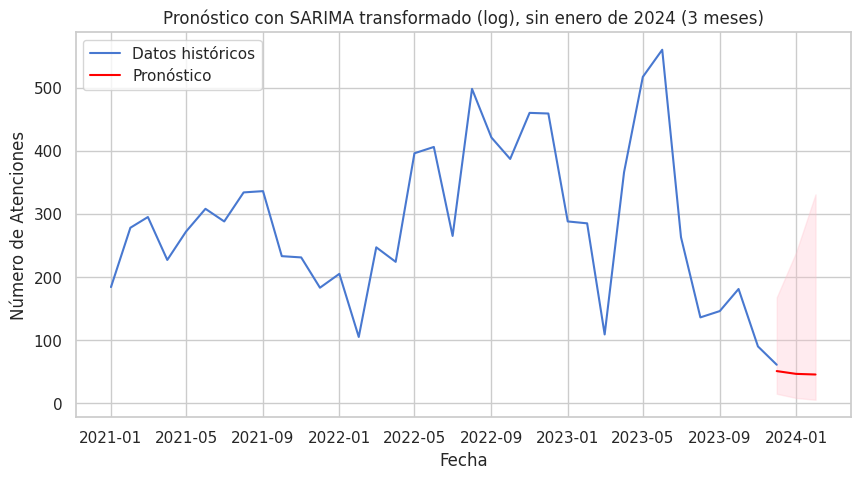

In [98]:
# 1. Eliminar enero de 2024 de los datos históricos
series_filtered = series[:'2023-12-01']  # Filtrar hasta diciembre de 2023

# 2. Aplicar la transformación logarítmica a la serie filtrada
series_log = np.log(series_filtered + 1)  # Se suma 1 para evitar log(0)

# 3. Ajustar el modelo SARIMA en los datos transformados
model_log = SARIMAX(series_log, order=(0, 1, 0), seasonal_order=(0, 1, 1, 12))
model_log_fit = model_log.fit()

# 4. Realizar los pronósticos (3 pasos hacia adelante)
forecast_log = model_log_fit.get_forecast(steps=3)
forecast_values_log = forecast_log.predicted_mean

# 5. Revertir la transformación logarítmica (volviendo a la escala original)
forecast_values = np.exp(forecast_values_log) - 1

# 6. Obtener los intervalos de confianza
confidence_intervals_log = forecast_log.conf_int()
confidence_intervals = np.exp(confidence_intervals_log) - 1

# 7. Visualización del pronóstico sin enero de 2024 en los datos históricos
forecast_index = pd.date_range(start=series_filtered.index[-1], periods=3, freq='MS')
plt.figure(figsize=(10, 5))
plt.plot(series_filtered.index, series_filtered, label='Datos históricos')
plt.plot(forecast_index, forecast_values, label='Pronóstico', color='red')
plt.fill_between(forecast_index, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1],
                 color='pink', alpha=0.3)
plt.title('Pronóstico con SARIMA transformado (log), sin enero de 2024 (3 meses)')
plt.xlabel('Fecha')
plt.ylabel('Número de Atenciones')
plt.legend()
plt.show()

**CONCLUSIONES**

*Tendencia:* El pronóstico muestra una tendencia leve hacia la estabilización, aunque el **número de atenciones comntinua disminuyendo**.

*Intervalo de confianza: **El intervalo de confianza** parece razonable y no es demasiado amplio
* El modelo tiene parece tener un comportamiento adecaudo pero solo en **predicciones menores a 3 meses** .

*Generales :*

* Cuando se esta haciendo **tratamiento de las variables** es importante **tener un modelo en mente**, para no hacer tratamientos que no vayan a sumar al modelo. **tratamientos que no eran acordes al modelo **
* Para utilizar el **modelo ARIMA o SARIMA** se deben hacer **varias iteraciones** ajustando los párametros.
* **Aún en la parte de despliegue** del modelo se pueden **encontrar datos que esten evitando el buen funcionamiento del mismo**, para este caso los datos de **enero de 2024** que eran datos imcompletos debido al momento donde se obtuvieron los datos, y que por ende estaban evitando un optimo funcionamiento del modelo.
* El primer resultado del modelo SARIMA empezó a mostrar posibles intervalos de error negativo que **teniendo el contexto de los datos no tendría sentido** por lo tanto es mejor evitarlo
* Dada la **cantidad de datos historicos**, y el **intervalo de confianza**, solo hizo sentido pronosticar 3 meses adicionales de acuerdo al intervalo de error
* De acuerdo a los párametros del modelo **se podía seguir optimizando**, no se por cuantas iteraciones por lo tanto es importante **tener un límite**.

**EVALUAR PRECUSIÓN DE SARIMA**

In [99]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 1. Dividir los datos en conjunto de entrenamiento y prueba
train_size = int(len(series) * 0.8)  # Usar el 80% de los datos para entrenar
train, test = series_filtered[:train_size], series_filtered[train_size:]

# 2. Aplicar la transformación logarítmica al conjunto de entrenamiento
train_log = np.log(train + 1)

# 3. Ajustar el modelo SARIMA con el conjunto de entrenamiento
model_log = SARIMAX(train_log, order=(0, 1, 0), seasonal_order=(0, 1, 1, 12))
model_log_fit = model_log.fit()

# 4. Realizar pronósticos para el conjunto de prueba
forecast_log = model_log_fit.get_forecast(steps=len(test))
forecast_values_log = forecast_log.predicted_mean

# Revertir la transformación logarítmica
forecast_values = np.exp(forecast_values_log) - 1

# 5. Calcular las métricas de error
mae = mean_absolute_error(test, forecast_values)
rmse = np.sqrt(mean_squared_error(test, forecast_values))
mape = np.mean(np.abs((test - forecast_values) / test)) * 100

# Mostrar las métricas de error
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")

Mean Absolute Error (MAE): 323.543489703018
Root Mean Squared Error (RMSE): 364.7643829943801
Mean Absolute Percentage Error (MAPE): 296.32524081711307%


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


* Mean Absolute Error MAE=  323.54 Error promedio significativo en las predicciones.

* Root Mean Squared Error RMSE = 364.76 Penaliza más los grandes errores, indicando problemas de ajuste.

* Mean Absolute Percentage Error / MAPE = 296.33% --> un error porcentual muy alto, lo que refleja un ajuste deficiente.


"Too few observations to estimate starting parameters for seasonal ARMA". -->  **Datos son insuficientes para capturar correctamente los patrones estacionales.**

**MÁS CONCLUSIONES**



* En general **el modelo presenta un error significativo en las predicciones**, con un MAE de 323.54 y un RMSE de 364.76, lo que refleja problemas de ajuste. Además, **el MAPE del 296.33% indica un error porcentual extremadamente alto**. La advertencia de "Too few observations" sugiere que los datos disponibles son insuficientes para capturar adecuadamente los patrones estacionales del modelo.

* Con los datos que se tienen y los modelos probados ***no es posible predecir el número de angioplastia coronaria transluminal percutánea (uno o dos vasos) en las cinco ciudades principales del país para un año con un porcentaje de acertividad del 85%.***

* Para otras iteraciones se podría ***hacer el ejecicio por cada ciudad***.

* Se buscarán ***más datos pasados, o por semana o por día*** para buscar un mayor nivel de acertividad